In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split 

In [2]:
df = pd.read_csv('CRM_new1.csv')
df.head()

,sales_enquiry_id,Product,Seller,Authority,Comp_size,Competitors,Purch_dept,Partnership,Budgt_alloc,Forml_tend,...,Source,Client,Scope,Strat_deal,Cross_sale,Up_sale,Deal_type,Needs_def,Att_t_client,Status
0,id-1001,Product A,Seller 6,Mid,Mid,No,Unknown,No,Yes,No,...,Referral,Current,Clear,Very important,No,Yes,Project,Yes,Strategic account,Won
1,id-1002,Product B,Seller 8,Mid,Big,No,Yes,No,Unknown,No,...,Referral,Current,Clear,Unimportant,No,Yes,Maintenance,Yes,Strategic account,Won
2,id-1003,Product F,Seller 1,Mid,Big,No,No,Yes,No,No,...,Joint past,Current,Few questions,Average important,Yes,No,Project,Info gathering,Strategic account,Won
3,id-1004,Product B,Seller 8,Mid,Big,No,Yes,No,No,No,...,Joint past,Current,Clear,Very important,No,Yes,Maintenance,Yes,Strategic account,Won
4,id-1005,Product C,Seller 1,Mid,Small,Unknown,No,No,No,No,...,Unknown,New,Few questions,Average important,No,No,Project,No,Normal,Won


In [3]:
data=df
data.Status.replace(["Won", "Lost"], [1, 0], inplace= True)
data.drop("sales_enquiry_id", axis= 1, inplace= True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product       448 non-null    object
 1   Seller        448 non-null    object
 2   Authority     448 non-null    object
 3   Comp_size     448 non-null    object
 4   Competitors   448 non-null    object
 5   Purch_dept    448 non-null    object
 6   Partnership   448 non-null    object
 7   Budgt_alloc   448 non-null    object
 8   Forml_tend    448 non-null    object
 9   RFI           448 non-null    object
 10  RFP           448 non-null    object
 11  Growth        448 non-null    object
 12  Posit_statm   448 non-null    object
 13  Source        448 non-null    object
 14  Client        448 non-null    object
 15  Scope         448 non-null    object
 16  Strat_deal    448 non-null    object
 17  Cross_sale    448 non-null    object
 18  Up_sale       448 non-null    object
 19  Deal_typ

In [4]:
data = pd.get_dummies(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Status                          448 non-null    int64
 1   Product_Product A               448 non-null    uint8
 2   Product_Product B               448 non-null    uint8
 3   Product_Product C               448 non-null    uint8
 4   Product_Product D               448 non-null    uint8
 5   Product_Product E               448 non-null    uint8
 6   Product_Product F               448 non-null    uint8
 7   Product_Product G               448 non-null    uint8
 8   Product_Product H               448 non-null    uint8
 9   Product_Product I               448 non-null    uint8
 10  Product_Product J               448 non-null    uint8
 11  Product_Product K               448 non-null    uint8
 12  Product_Product L               448 non-null    uint8
 13  Produ

In [5]:
X = data.drop("Status", axis= 1)
y = data.Status

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)
#y_train_onehot = pd.get_dummies(y).values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)
y_train_onehot = pd.get_dummies(y_train).values

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Convolution2D, MaxPooling2D, Flatten
from keras import optimizers
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [9]:
img_rows, img_cols = 19,5
nb_filters = 1000
pool_size = (1, 1)
kernel_size = (1, 1)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [10]:
model = Sequential()
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('tanh'))
model.add(Dropout(0.25))
model.add(Dense(2))
model.add(Activation('sigmoid'))
model.compile(loss='mean_squared_error', optimizer='Nadam', metrics=['accuracy'])
model.fit(X_train, y_train_onehot, epochs=30)

f:\anaconda3\envs\dl1\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1000, (1, 1), input_shape=(19, 5, 1), padding="valid")`
  after removing the cwd from sys.path.
f:\anaconda3\envs\dl1\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1000, (1, 1))`
  



Epoch 1/30
358/358 [==============================] - 2s 7ms/step - loss: 0.2423 - accuracy: 0.7179
Epoch 2/30
358/358 [==============================] - 1s 2ms/step - loss: 0.1668 - accuracy: 0.7737
Epoch 3/30
358/358 [==============================] - 1s 2ms/step - loss: 0.1581 - accuracy: 0.7961
Epoch 4/30
358/358 [==============================] - 1s 2ms/step - loss: 0.1614 - accuracy: 0.7542
Epoch 5/30
358/358 [==============================] - 1s 2ms/step - loss: 0.1499 - accuracy: 0.7933
Epoch 6/30
358/358 [==============================] - 1s 2ms/step - loss: 0.1490 - accuracy: 0.7849
Epoch 7/30
358/358 [==============================] - 1s 2ms/step - loss: 0.1508 - accuracy: 0.7849
Epoch 8/30
358/358 [==============================] - 1s 2ms/step - loss: 0.1463 - accuracy: 0.7989
Epoch 9/30
358/358 [==============================] - 1s 2ms/step - loss: 0.1435 - accuracy: 0.8017
Epoch 10/30
358/358 [==============================] - 1s 2ms/step - loss: 0.1403 - accuracy: 0.815

In [11]:
y_pred = model.predict(X_test)

In [12]:
y_pred

array([[0.91033185, 0.08828321],
       [0.00323728, 0.99837327],
       [0.98002243, 0.01525208],
       [0.17234552, 0.84217525],
       [0.06530043, 0.87086123],
       [0.03640535, 0.95275253],
       [0.05626437, 0.9326451 ],
       [0.9180448 , 0.1928089 ],
       [0.07578048, 0.8751327 ],
       [0.96324825, 0.02195799],
       [0.08821312, 0.87911195],
       [0.798784  , 0.1565766 ],
       [0.06604454, 0.92642635],
       [0.349297  , 0.5440045 ],
       [0.12017325, 0.8738272 ],
       [0.02748045, 0.95053375],
       [0.0033949 , 0.9983566 ],
       [0.85396886, 0.1137656 ],
       [0.38046896, 0.18524304],
       [0.98408246, 0.00943354],
       [0.02067515, 0.9791614 ],
       [0.00628328, 0.9970248 ],
       [0.00459871, 0.99354887],
       [0.11122158, 0.94197875],
       [0.99598324, 0.0042302 ],
       [0.79041016, 0.20683831],
       [0.22714257, 0.7228732 ],
       [0.97908604, 0.01459235],
       [0.06604454, 0.92642635],
       [0.30345106, 0.9052961 ],
       [0.

In [13]:
print(y_pred.shape)

(90, 2)


In [14]:
y_pred = (y_pred > 0.5)
y_pred[0]

array([ True, False])

In [15]:
y_pred1=y_pred[:,1]

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred1)
cm

array([[35,  9],
       [ 8, 38]], dtype=int64)

In [17]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split 
import keras 
from keras.models import Sequential 
from keras.layers import InputLayer 
from keras.layers import Dense 
from keras.layers import Dropout 
from keras.constraints import maxnorm
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [18]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80        44
           1       0.81      0.83      0.82        46

    accuracy                           0.81        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.81      0.81      0.81        90



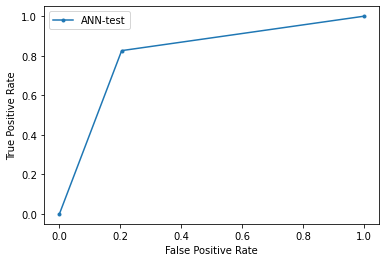

In [19]:
lr_fpr, lr_tpr, _ = roc_curve(y_test,y_pred1)
# plot the roc curve for the model
#pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='ANN-test')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

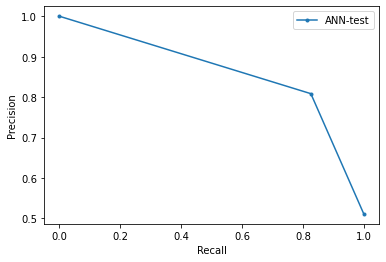

In [20]:
precision, recall, thresholds = precision_recall_curve(y_test,y_pred1)
pyplot.plot(recall, precision, marker='.', label='ANN-test')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()